   Unnamed: 0                     Model        Datentyp           Error  \
0           0        Lineare Regression  Standard Split  Mittelwert MAE   
1           1   Polynominale Regression  Standard Split  Mittelwert MAE   
2           2  Random Forest Regression  Standard Split  Mittelwert MAE   
3           3     KNeighbors Regression  Standard Split  Mittelwert MAE   
4           4        Lineare Regression     Blech Split  Mittelwert MAE   
5           5   Polynominale Regression     Blech Split  Mittelwert MAE   
6           6  Random Forest Regression     Blech Split  Mittelwert MAE   
7           7     KNeighbors Regression     Blech Split  Mittelwert MAE   

                        X                      Y                    Phi  \
0  1,2468165627921269e-15     0,9248419635812393     1,3183745558957898   
1   8,614753787306168e-15     0,3328351495324318     0,6909909643395495   
2   6,312709812667902e-05   0,008938997235174707   0,016817388601477877   
3    5,88644070020349e-1

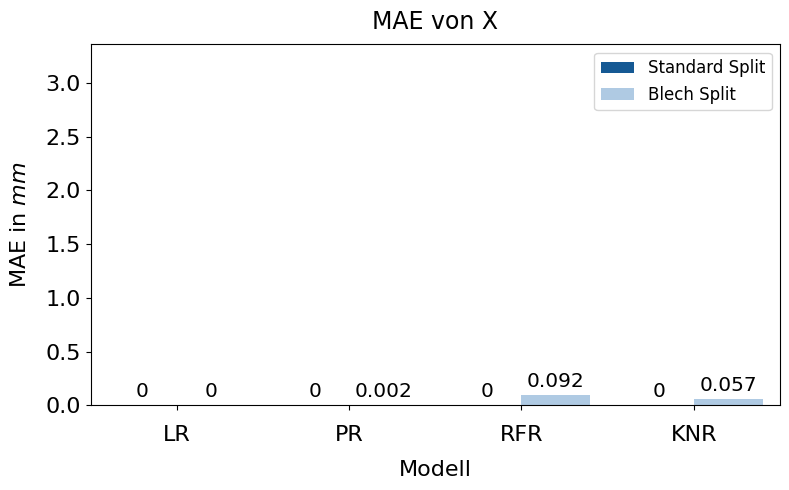

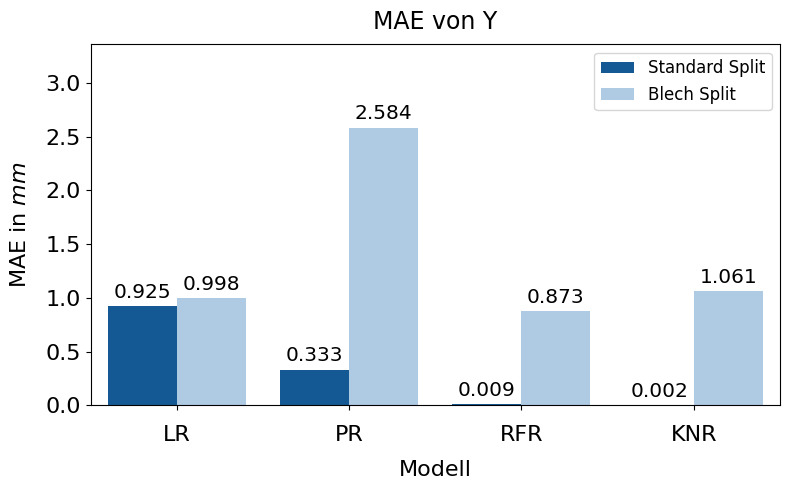

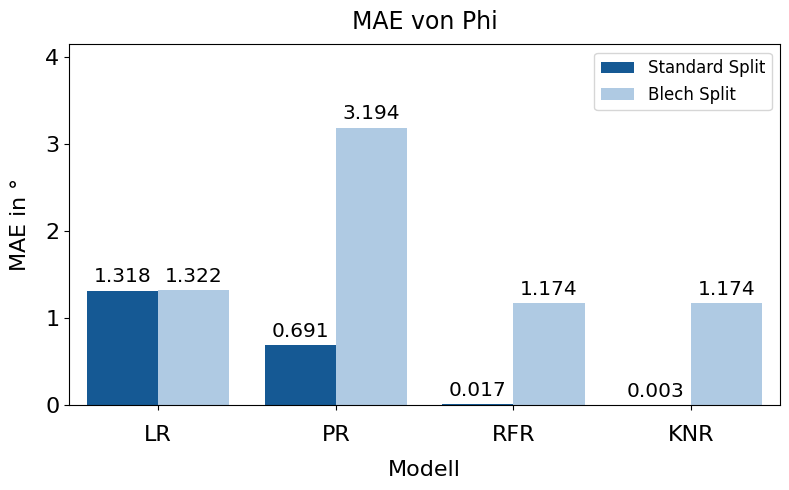

In [1]:
# Plot aller konventionellen Modelle für Standard und Blech Split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reinladen der Daten von Mittelwert und Standardabweichung der vier konventionellen Modelle 
Ordner = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\Konventionelle Modelle'

# Für die Ergebnisse des gesamten stationären Bereiches ohne Features
MAEs_ges =pd.read_csv(f'{Ordner}\Ergebnisse_besteModelle_Konventionell_Mittelwert_Std_Random002.csv', delimiter= ';')

# Falls die Plots gespeichert werden soll hier Speichern = 1 angeben
Speichern =0

#print(MAEs_ges)
# Droppe unnötige Columns
MAEs_ges = MAEs_ges.drop(columns=['Model.1','Datentyp.1'])

# Columns dessen Werte in ein Float umgewandelt werden sollen
columns = ['X','Y','Phi','X.1','Y.1','Phi.1']

# Umwandlung der Spalten in Float und , in . für Python
for Column in columns:
        MAEs_ges[Column] = MAEs_ges[Column].astype(str).str.replace(',', '.')
        MAEs_ges[Column] = MAEs_ges[Column].astype(float)
    

# Benenne die langen Namen der Modelle in ihre Abkürzungen
Umbenennung_Modelle = {'Lineare Regression':'LR', 'Polynominale Regression':'PR','Random Forest Regression':'RFR', 'KNeighbors Regression':'KNR'}
MAEs_ges['Model'] = MAEs_ges['Model'].replace(Umbenennung_Modelle)

# Falls nur der Standard Split ausgewählt werden will
# MAE_Standard = MAEs_ges[MAEs_ges['Datentyp'] == 'Standard Split']

# Plot der MAE's aller konventionellen Methoden in Gegenüberstellung der unterschiedlichen Splits

# Definition für die Erstellung der drei Plots
Labels = ['X', 'Y', 'Phi']
Y_Achse = ['mm', 'mm', '°']

# Definition der Farben für die Thesis
color_thesis1 =(0, 90/255, 169/255) # Dunkelblau aus Thesis
color_thesis2 =(166/255, 202/255, 236/255)  #Hellblau aus Abbildungen
color_thesis3 =(77/255, 140/255, 195/255) #mittleres Blau
#custom_palette = sns.color_palette(["#1f77b4", "#aec7e8", "#003f5c", "#7fbc41", "#2ca02c", "#98df8a"])
custom_palette = sns.color_palette([color_thesis1,color_thesis2])


# Hier gewünschten Sicherungsordner festlegen
Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\Konventionelle Modelle\\Bar_Chart_AlleModelle_BlechzuStandardSplit'     
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

# Berechne den maximalen Wert für 'Y' um X-Achse daran anzupassen
max_y_value = MAEs_ges['Y'].max()

# Schleife durch Metriken (X, Y, Phi)
for index, (Label, Einheit) in enumerate(zip(Labels, Y_Achse)):
    plt.figure(figsize=(8,5))
    # BarPLot erstellen, x-Achse Modell, Y das entsprechende Labels also der Verstellweg, und hue gibt die zwei Balken nebeneinander an, also Standard und Blech Split
    ax = sns.barplot(data=MAEs_ges, x='Model', y=Label, hue='Datentyp', palette=custom_palette)
    plt.title(f'MAE von {Label}', fontsize=17, pad=11)
    ax.set_xlabel('Modell', fontsize=16, labelpad=11)
    # Anpassen der Y-Achsen-Beschriftung mit kursivem 'mm' oder anderer Einheit
    ax.set_ylabel(f'MAE in $\\it{{{Einheit}}}$', fontsize=16, labelpad=11)  # MathText für Kursivschrift

        # Iteration über die x Achsen Plots um Wert der Balken anzugeben 
    for p in ax.patches:
        height = p.get_height()
        # Wenn der Wert kleiner 0.0009 ist wird 0 angegeben
        display_value = 0 if height < 0.0009 else height
        # Hier kann über f die Anzahl an Kommastellen angegeben werden
        ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14.5)
        
        # Anpassen der Legende, um Titel dieser zu entfernen 
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[0:2], labels[0:2], title=None, loc='upper right', fontsize=12)

        # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
        max_value = MAEs_ges[Label].max()  # Höchster Balkenwert
        if Label == 'X':
                plt.ylim(0, max_y_value * 1.3)  # Verwende den maximalen Y-Wert für X
        else:
                plt.ylim(0, max_value * 1.3)  # Vergrößern der oberen Grenze zum Ende des Plots um 30% über den höchsten Balkenwert

        # X- und Y-Achsen Bereich, falls Schriftgröße angepasst werden muss
        ax.tick_params(axis='x', labelsize=16, pad=10.5)  
        ax.tick_params(axis='y', labelsize=16) 

        # Für bessere Positionierung in Präsi oder Word
        plt.tight_layout()

        if Speichern ==1:
                # Speicherung der Daten als png und svg
                plt.savefig(os.path.join(Sicherungsordner, f'{Label}_MAE_BarChart_Mittelwert_Standard-Blechsplit_Random2.svg'), format='svg')    
                plt.savefig(os.path.join(Sicherungsordner, f'{Label}_MAE_BarChart_Mittelwert_Standard-Blechsplit_Random2.png'), format='png')      

#plt.show()

   Unnamed: 0                     Model                            Datentyp  \
4           4        Lineare Regression  Gesamter extrahierter Datenbereich   
5           5   Polynominale Regression  Gesamter extrahierter Datenbereich   
6           6  Random Forest Regression  Gesamter extrahierter Datenbereich   
7           7     KNeighbors Regression  Gesamter extrahierter Datenbereich   

            Error             X         Y       Phi  
4  Mittelwert MAE  1.869036e-15  0.998415  1.322019  
5  Mittelwert MAE  1.608012e-03  2.583997  3.193841  
6  Mittelwert MAE  9.194464e-02  0.873458  1.173675  
7  Mittelwert MAE  5.714286e-02  1.061488  1.173667  
   Unnamed: 0                     Model            Datentyp           Error  \
4           4        Lineare Regression  Feature Extraktion  Mittelwert MAE   
5           5   Polynominale Regression  Feature Extraktion  Mittelwert MAE   
6           6  Random Forest Regression  Feature Extraktion  Mittelwert MAE   
7           7     

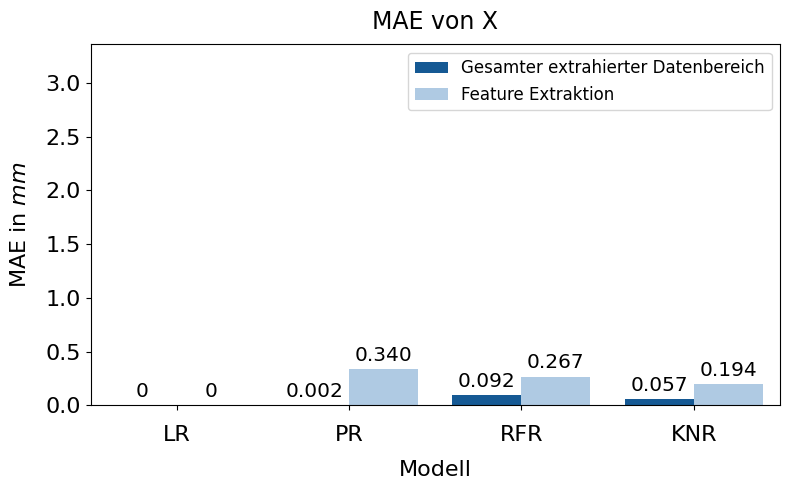

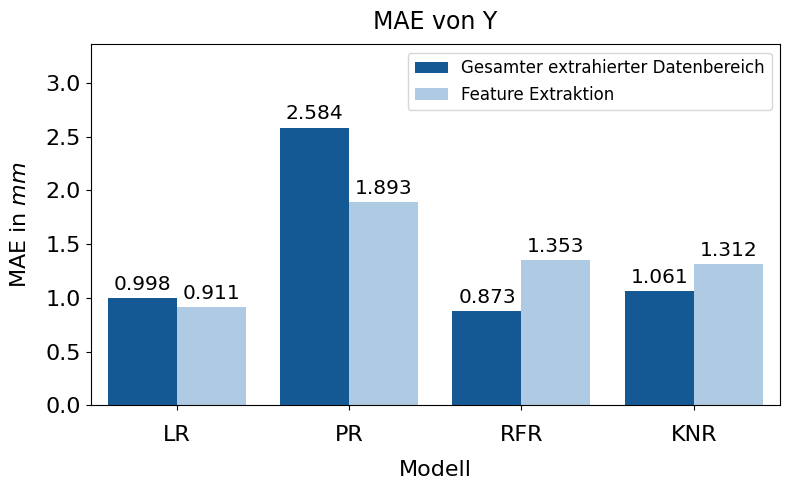

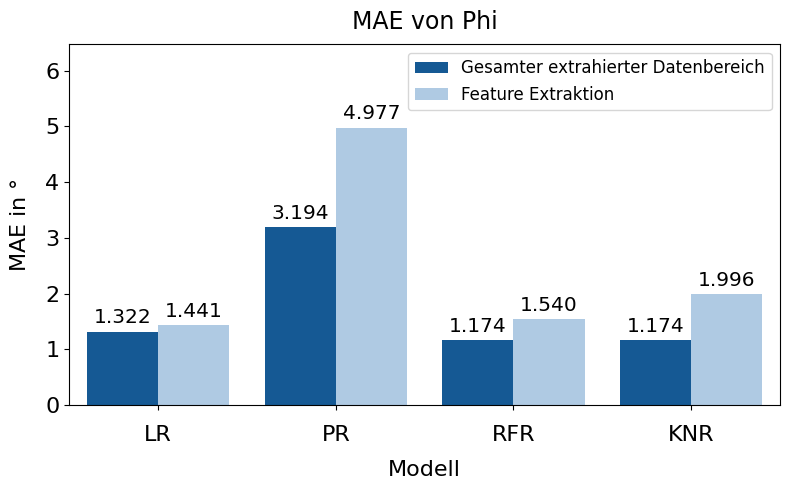

In [3]:
# Plot von Feature Extraktions Ergebnissen mit ursprünglichen Ergebnissen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ordner der Excel Dateien für die Ergebnisse von den allgemeinen Ergebnisse für den stationären Bereich und für die Feature Extraktion
Ordner_features = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\Konventionelle Modelle\Ergebnisse_extrahierteFeatures'
Ordner_alle = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\Konventionelle Modelle'

# Ergebnisse für die Feature Generation aus dem stationären Bereich
MAEs_ges_feature =pd.read_csv(f'{Ordner_features}\Ergebnisse_AlleModelle_Konventionell_FeatureGeneration_Mittelwert_Std_Random2.csv', delimiter= ';')
MAEs_ges_feature = MAEs_ges_feature.drop(columns=['Model.1','Datentyp.1'])

# Für die Ergebnisse des gesamten stationären Bereiches ohne Features
MAEs_ges =pd.read_csv(f'{Ordner_alle}\Ergebnisse_besteModelle_Konventionell_Mittelwert_Std_Random002.csv', delimiter= ';')

# Columns zum Umwandeln in FLoat
columns = ['X','Y','Phi','X.1','Y.1','Phi.1']

# Umwandlung der Spalten in FLoats für Python
for Column in columns:
        MAEs_ges_feature[Column] = MAEs_ges_feature[Column].astype(str).str.replace(',', '.')
        MAEs_ges_feature[Column] = MAEs_ges_feature[Column].astype(float)
        MAEs_ges[Column] = MAEs_ges[Column].astype(str).str.replace(',', '.')
        MAEs_ges[Column] = MAEs_ges[Column].astype(float)
        
        
# Wähle nur den BlechSplit aus und Replace Blechsplit mit der Feature Extraktion für die Plots
MAEs_Features = MAEs_ges_feature[MAEs_ges_feature['Datentyp'] == 'Blech Split'] 
MAEs_Features = MAEs_Features.iloc[:,:7]
MAEs_Features['Datentyp'] = MAEs_Features['Datentyp'].replace('Blech Split', 'Feature Extraktion')

# Wähle nur den BlechSplit aus und Replace Blechsplit mit der Bezeichnung für den gesamten stationären Datenbereich für die Plots
MAEs_Bereich = MAEs_ges[MAEs_ges['Datentyp'] == 'Blech Split']
MAEs_Bereich = MAEs_Bereich.iloc[:,:7]
MAEs_Bereich['Datentyp'] = MAEs_Bereich['Datentyp'].replace('Blech Split', 'Gesamter extrahierter Datenbereich')

print(MAEs_Bereich)
print(MAEs_Features)

# Führe beide Dataframes zusammen aus den beiden Fallunterscheidungen
MAE_Feature_Bereich = pd.concat([MAEs_Bereich, MAEs_Features], axis =0)

# Benennen die Modelle um zu den Abkürzungen
Umbenennung_Modelle = {'Lineare Regression':'LR', 'Polynominale Regression':'PR','Random Forest Regression':'RFR', 'KNeighbors Regression':'KNR'}
MAE_Feature_Bereich['Model'] = MAE_Feature_Bereich['Model'].replace(Umbenennung_Modelle)

# Plot der MAE's aller konventionellen Methoden in Gegenüberstellung der unterschiedlichen Splits

# Berechne den maximalen Wert für Y
max_y_value = MAEs_ges['Y'].max()

# Definiere Labels und Einheiten für jeden einzelnen Plot über den iteriert wird
Labels = ['X', 'Y', 'Phi']
Y_Achse = ['mm', 'mm', '°']

# Farben für die Plots aus der Thesis
color_thesis1 =(0, 90/255, 169/255) # Dunkelblau aus Thesis
color_thesis2 =(166/255, 202/255, 236/255)  #Hellblau aus Abbildungen
color_thesis3 =(77/255, 140/255, 195/255) #mittleres Blau
#custom_palette = sns.color_palette(["#1f77b4", "#aec7e8", "#003f5c", "#7fbc41", "#2ca02c", "#98df8a"])
custom_palette = sns.color_palette([color_thesis1,color_thesis2])

# Falls Plots gespeichert werden sollen 1 angeben
Speichern =0

# Lege hier den Speicherordner fest für die Plots
Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\Konventionelle Modelle\Bar_Chart_AlleModelle_FeatureGeneration_zuDatenbereich'     
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

# Schleife durch Metriken (X, y, phi)
for index, (Label, Einheit) in enumerate(zip(Labels, Y_Achse)):
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=MAE_Feature_Bereich, x='Model', y=Label, hue='Datentyp', palette=custom_palette)
    plt.title(f'MAE von {Label}', fontsize=17, pad=11)
    ax.set_xlabel('Modell', fontsize=16, labelpad=11)
    # Anpassen der Y-Achsen-Beschriftung mit kursivem 'mm' oder anderer Einheit
    ax.set_ylabel(f'MAE in $\\it{{{Einheit}}}$', fontsize=16, labelpad=11)  # MathText für Kursivschrift
    
        # Iteration über die x Achsen Plots um Wert der Balken anzugeben 
    for p in ax.patches:
        height = p.get_height()
        # Wenn der Wert kleiner 0.0009 ist wird 0 angegeben
        display_value = 0 if height < 0.0009 else height
        # Hier kann über f die Anzahl an Kommastellen angegeben werden
        ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14.5)

        # Anpassen der Legende, um Titel dieser zu entfernen 
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[0:2], labels[0:2], title=None, loc='upper right', fontsize=12)

        # Anpassen der Legende, um Titel dieser zu entfernen 
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[0:2], labels[0:2], title=None, loc='upper right', fontsize=12)

        # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
        max_value = MAE_Feature_Bereich[Label].max()  # Höchster Balkenwert

        if Label == 'X':
                plt.ylim(0, max_y_value * 1.3)  # Verwende den maximalen Y-Wert für X
        else:
                plt.ylim(0, max_value * 1.3)  # Vergrößern der oberen Grenze um 30% zum Maximalwert

        # Anpassen der Variablen in Größe und Abstand zur Achse
        ax.tick_params(axis='x', labelsize=16, pad=10.5)
        ax.tick_params(axis='y', labelsize=16)

        plt.tight_layout()

        if Speichern ==1:
                # Speichern der Plots als SVG und PNG
                plt.savefig(os.path.join(Sicherungsordner, f'{Label}_MAE_BarChart_Feature_gegenueber_Bereich_Blechsplit_Random2.svg'), format='svg')    
                plt.savefig(os.path.join(Sicherungsordner, f'{Label}_MAE_BarChart_Feature_gegenueber_Bereich_Blechsplit_Random2.png'), format='png')      

plt.show()

C:\Users\corvi\AppData\Local\Temp\ipykernel_27956\3291462597.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MAE_test_df[Column] = MAE_test_df[Column].astype(str).str.replace(',', '.')
C:\Users\corvi\AppData\Local\Temp\ipykernel_27956\3291462597.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MAE_test_df[Column] = MAE_test_df[Column].astype(float)


                  model_name  X_start  X_end Datentyp Error         X  \
0   Random Forest Regression        0   1800     Test   MAE  0.177334   
1   Random Forest Regression       87   1669     Test   MAE  0.176769   
2   Random Forest Regression      400    991     Test   MAE  0.214118   
3   Random Forest Regression      531    698     Test   MAE  0.249347   
4   Random Forest Regression     1315   1777     Test   MAE  0.181929   
5   Random Forest Regression      369   1005     Test   MAE  0.203252   
6   Random Forest Regression      283   1563     Test   MAE  0.178655   
7   Random Forest Regression      895   1646     Test   MAE  0.185768   
8   Random Forest Regression     1460   1649     Test   MAE  0.187726   
9   Random Forest Regression      999   1784     Test   MAE  0.181809   
10  Random Forest Regression      383    819     Test   MAE  0.212572   

           Y       Phi   x_labels  Unnamed: 0              model_name.1  \
0   0.727167  0.650113   [0,1800]         NaN   

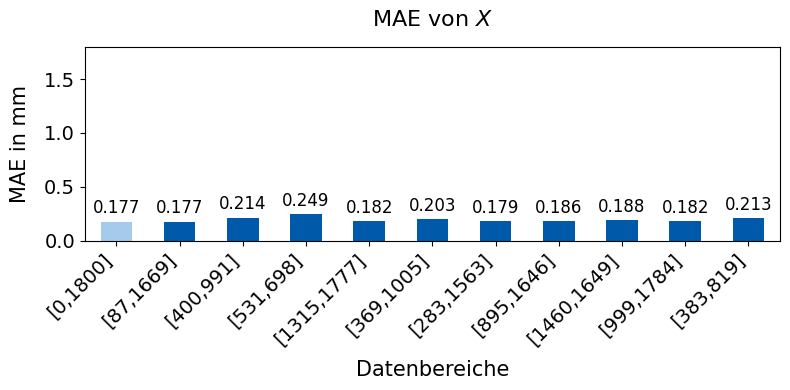

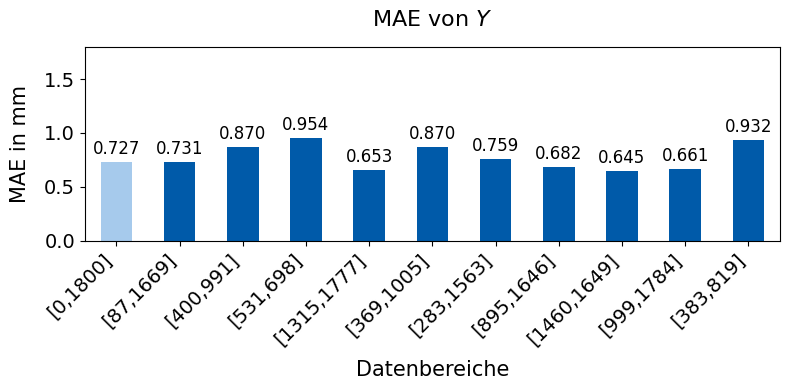

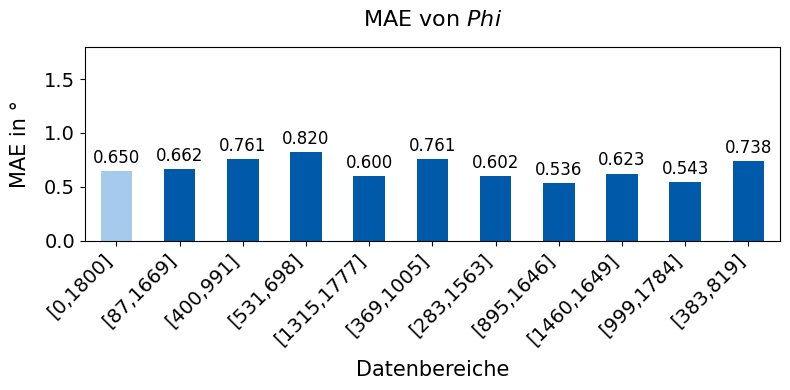

In [4]:
# Plot für die Variation der Datenbereiche
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# Ordner in dem die CSV für den Vergleich der Datenbereiche abgelegt ist
Ordner = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\Konventionelle Modelle\Datenbereiche_Einfluss'
# Für die Ergebnisse des gesamten stationären Bereiches ohne Features
# Eingeben des Zufallsfaktors 11 oder 7, muss dann auch beim Speichern unten geändert werden
MAE_df =pd.read_csv(f'{Ordner}\Ergebnisse_CrossValidation_RFR_Blechsplit_RandomBereich[1,1800]_RandomSeed11_Bereich2.csv', delimiter= ';')

# Nutze nur die Test Daten
MAE_test_df = MAE_df[(MAE_df['Datentyp'] =='Test')]

# Umwandlung der Columns/Spalten in Floats für Python
columns = ['X','Y','Phi']

for Column in columns:
        MAE_test_df[Column] = MAE_test_df[Column].astype(str).str.replace(',', '.')
        MAE_test_df[Column] = MAE_test_df[Column].astype(float)
        
# Einfügen der Ergebnisse für den Datenbereich von [0,1800] Auskommentieren des entsprechend nicht verwendeten Zufallsfaktor
# Neue Zeile für Referenzwert MAE RandomSeed 7
# Für Random 7
#Neue_Zeile = pd.DataFrame([{'model_name':'Random Forest Regression', 'X_start':0,'X_end':1800,'Datentyp':'Test','Error':'MAE','X':0.159050476,'Y':0.948699711756055,'Phi':1.14136279058209, 'x_labels':' [0,1800]'}])
# Für Random 11
Neue_Zeile = pd.DataFrame([{'model_name':'Random Forest Regression', 'X_start':0,'X_end':1800,'Datentyp':'Test','Error':'MAE','X':0.177333747,'Y':0.727167286,'Phi':0.650112502, 'x_labels':' [0,1800]'}])

MAE_test_df_neu = pd.concat([Neue_Zeile,MAE_test_df], ignore_index=True, axis=0)
print(MAE_test_df_neu)


# Plot der MAE's aller konventionellen Methoden in Gegenüberstellung der unterschiedlichen Splits

# Einheiten und Labels für jeden Plot über den iteriert wird 
Labels = ['X', 'Y', 'Phi']
Y_Achse = ['MAE in', 'MAE in', 'MAE in']
Einheit = ['mm', 'mm','°']

# Falls Plots gespeichert werden sollen 1 angeben
Speichern =1

# Farbe festlegen für die Plots
color_thesis =(166/255, 202/255, 236/255)  #Hellblau aus Abbildungen
color_thesis2 =(0, 90/255, 169/255) #dunkles Blau wie vom Header
farben = [(1, 0.647, 0)] + [(0, 0, 1)] * (len(MAE_test_df_neu) - 1)  # Orange für den ersten Balken, Blau für die restlichen
palette_1 = [color_thesis] + [color_thesis2] * (len(MAE_test_df_neu) - 1)

# Lege hier den Speicherordner fest für die Plots
Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\Konventionelle Modelle'    
 
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

#Labels für die x-Achse aus Start und End Wert im ausgewählten Bereich
MAE_test_df_neu['x_labels'] = '[' + MAE_test_df_neu['X_start'].astype(str) + ',' + MAE_test_df_neu['X_end'].astype(str) + ']'

# Schleife durch Metriken (X, y, phi)
for Label,Y_Achs, einheiten in zip(Labels, Y_Achse, Einheit):
    
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(data=MAE_test_df_neu, x='x_labels', y=Label, width=0.5)
    # Farben für Balken festlegen
    colors = [color_thesis] + [color_thesis2] * (len(ax.patches) - 1)  # Setzt die erste Farbe auf Hellblau den rest auf Dunkelblau
    
    # Setze die Farben der Balken
    for bar, color in zip(ax.patches, colors):
        # Hier die Farben der Balken anpassen
        bar.set_facecolor(color)
    # ax = sns.barplot(data=MAE_test_df,x=[1,2,3,4,5,6,7,8,9,10], y=Label, color=color_thesis2, width=0.5)
    # Titel Größe etc.
    plt.title(f'MAE von $\\it{{{Label}}}$', pad=15, fontsize=16)
    # Name x Achse etc.
    ax.set_xlabel('Datenbereiche', labelpad=8, fontsize=15)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)  # Anpassen der X Ticks auf gewünschte Größe und Position
    
    ax.set_ylabel(f'{Y_Achs} {einheiten}', labelpad=10, fontsize=15)  # Abstand des y-Labels von der Achse 
    plt.ylim(0,1.5)
    
    #plt.grid(True, which='both', linewidth=0.5, linestyle='-')
    #ax.set_axisbelow(True)
    
        # Iteration über die x Achsen Plots um Wert der Balken anzugeben 
    for p in ax.patches:
        height = p.get_height()
        # Wenn der Wert kleiner 0.0009 ist wird 0 angegeben
        display_value = 0 if height < 0.0009 else height
        # Hier kann über f die Anzahl an Kommastellen angegeben werden
        ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
        
        # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
        max_value = MAE_test_df[Label].max()  # Höchster Balkenwert
        # plt.ylim(0, max_value * 1.1)  # Vergrößern der oberen Grenze um 30% zum Maximalwert
        plt.ylim(0, 1.8)

        # Anpassen der Y Werte an der Achse
        ax.tick_params(axis='y', labelsize=14)
    
    plt.tight_layout()
    
    if Speichern ==1: 
   
        plt.savefig(os.path.join(Sicherungsordner, f'{Label}_CrossValidation_RFR_Blechsplit_[1,1800]_Datenbereiche_RandomSeed11_Bereich2.svg'), format='svg')    
        plt.savefig(os.path.join(Sicherungsordner, f'{Label}_CrossValidation_RFR_Blechsplit_[1,1800]_Datenbereiche_RandomSeed11_Bereich2.png'), format='png')      

plt.show()

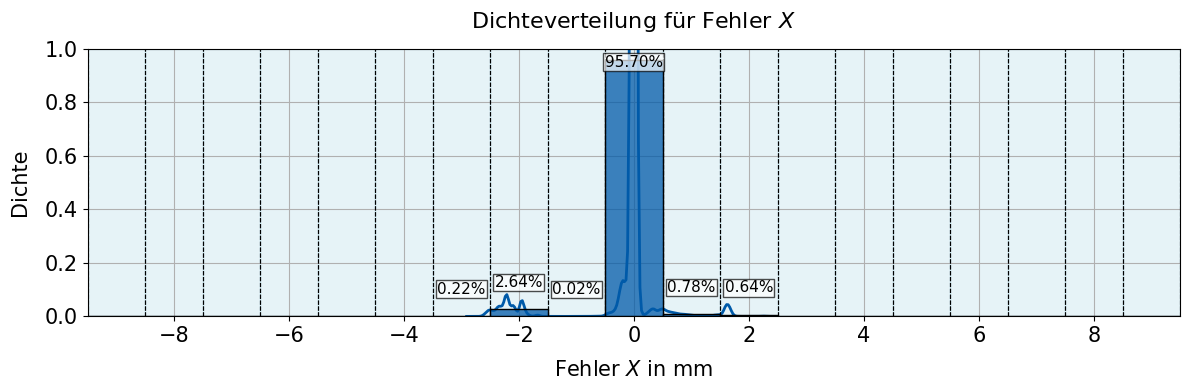

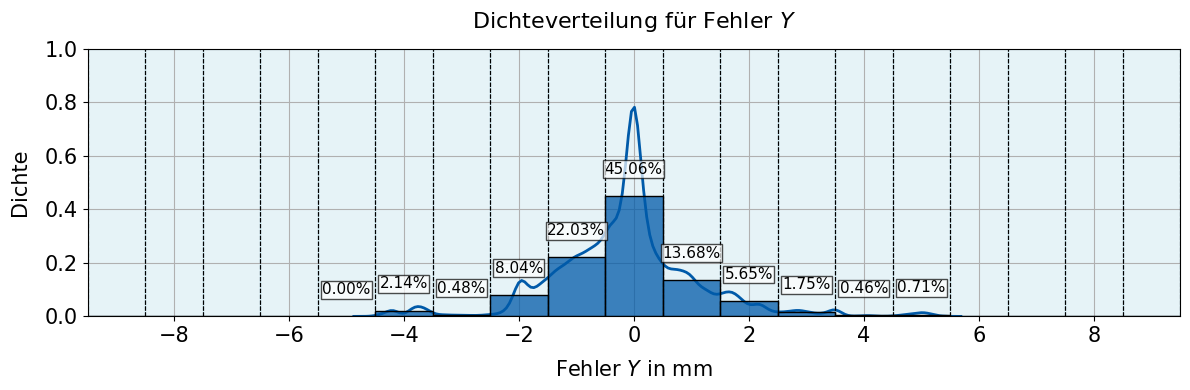

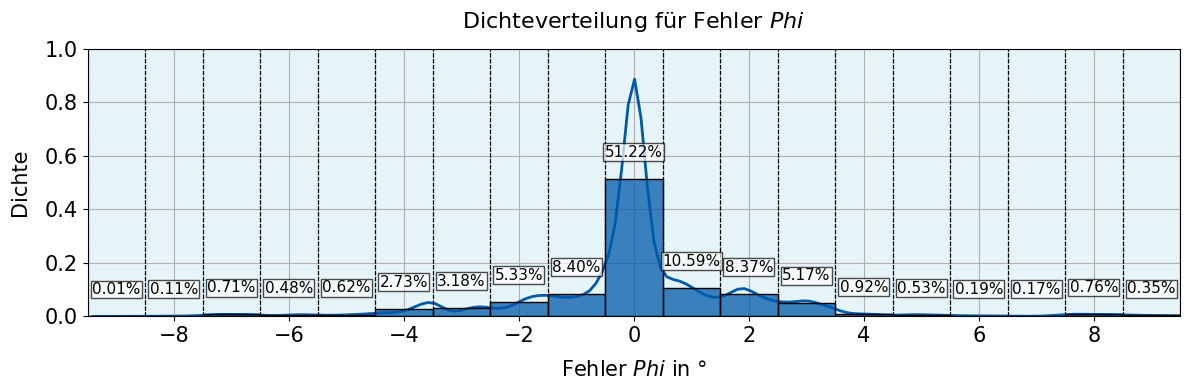

In [7]:
#Plots für die Dichteverteilung von Fehler/Prognose/Labels
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import numpy as np
import os
import pandas as pd

# Ordner in dem die Excel Datei der Fehler abgelegt ist
Ordner = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\Konventionelle Modelle'
# Reinladen der entsprechenden Fehler list, hier für alle konventionellen Modelle
Liste_Fehler =pd.read_csv(f'{Ordner}\Fehler_Konventionelle_Modelle_best_Blechsplit__gesamteFehler_Random02.csv', delimiter= ';')

print(Liste_Fehler)

# MAEs_ges = MAEs_ges.drop(columns=['Model.1','Datentyp.1'])

## Umwandlung der Columns/Spalten in Floats für Python
columns = ['Label_X','Label_Y','Label_Phi','Fehler_X','Fehler_Y','Fehler_Phi']
for Column in columns:
         Liste_Fehler[Column] = Liste_Fehler[Column].astype(str).str.replace(',', '.')
         Liste_Fehler[Column] = Liste_Fehler[Column].astype(float)

# Auswahl des Modells aus dem die Dichteverteilung erstellt werden soll
Liste_Fehler = Liste_Fehler[Liste_Fehler['Modell'] == 4]
# Lösche nicht benötigte Columns
Liste_Fehler =Liste_Fehler.drop(columns=['SplitMethode'])  

#print(Liste_Fehler.dtypes)
#Berechnung der Vorhersagen aus Labels und Fehlers, da diese bei der Cross Validation nicht berücksichtigt wurden
Liste_Vorhersage = pd.DataFrame()
Liste_Vorhersage['X'] = Liste_Fehler['Label_X'] - Liste_Fehler['Fehler_X']
Liste_Vorhersage['Y'] = Liste_Fehler['Label_Y'] - Liste_Fehler['Fehler_Y']
Liste_Vorhersage['Phi'] = Liste_Fehler['Label_Phi'] - Liste_Fehler['Fehler_Phi']

#print(Liste_Vorhersage.dtypes)
# Hier Ordner definieren, an dem die Plots gespeichert werden sollen
Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\Konventionelle Modelle\\Dichteverteilung_Vorhersagen'     
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

#Farbe für die Balken (wie Header in Thesis)
color_thesis2 =(0, 90/255, 169/255) #dunkelblau wie vom Header
highlight_color = (166/255, 202/255, 236/255)  # Hellblau aus den Abbildungen
color_thesis =(166/255, 202/255, 236/255)  

# Definition der verschiedenen Namen und Labels und Variablen über die die Plots erstellt werden sollen
Variablen = ['X','Y','Phi']
Liste_Benennung =['Fehler','Fehler', 'Fehler']
Liste_Benennung_Labels = ['Label', 'Label', 'Label']
Liste_Benennung_Vorhersage = ['Vorhersage', 'Vorhersage', 'Vorhersage']
ListeFehler = [Liste_Fehler['Fehler_X'],Liste_Fehler['Fehler_Y'], Liste_Fehler['Fehler_Phi']]
Liste_Labels = [Liste_Fehler['Label_X'], Liste_Fehler['Label_Y'], Liste_Fehler['Label_Phi']]
Liste_Vorhersagen = [Liste_Vorhersage['X'], Liste_Vorhersage['Y'],Liste_Vorhersage['Phi']]
Einheit = ['mm', 'mm', '°']

# Bereiche definieren für Prozente und der Bar Plots (Bis 9,5 da das letzte Label in der Größenordnung von Y bei 9 mm liegt)
bins= np.arange(-9.5, 10.5, 1)
bins_histo = np.arange(-9.5,10.5,1)

# Iteration für die Erstellung der 3 Plots für jedes Label
# Für Labels: ListeFehler = Liste_Labels und Liste_Benennung = Liste_Benennung_Labels
# Wenn Vorhersagen geplottet werden: Liste_Bennenung_Vorhersage und Liste_Vorhersagen unten in zip eintragen
# Für die Fehler in zip dabei belassen

for fehler, name, variable, einheit in zip(ListeFehler, Liste_Benennung, Variablen, Einheit):
    
    plt.figure(figsize=(12, 4))  # Größe der Abbildung in Zoll (Breite, Höhe)
    # Erstellen des Histogramms
    hist_data = sns.histplot(fehler, kde=False, color=color_thesis2 , bins=bins_histo, stat='density', zorder=3)
    
    # KDE-Kurve plotten
    sns.kdeplot(fehler, color=color_thesis2, linewidth=2, zorder=2)
    
    
    #Variation der Achsen und Titles
    hist_data.set_xlabel(f'{name} $\\it{{{variable}}}$ in {einheit}', fontsize=15, labelpad=10)  # MathText für Kursivschrift
    plt.ylabel('Dichte',labelpad=10.5, fontsize=15)
    plt.title(f'Dichteverteilung für {name} $\\it{{{variable}}}$',pad=15, fontsize=16)
    plt.grid(True, zorder=1)
    
    # Festlegen des X-Achsen-Bereichs
    plt.xlim(-9.5, 9.5)
    
    # Begrenzen der Y-Achse
    plt.ylim(0, 1)
    
    # STicks beschreiben und Größe festlegen
    plt.xticks(np.arange(-8, 9, 2), fontsize=15)
    plt.yticks(fontsize=15)
    
     # Berechnung und Anzeige der Wahrscheinlichkeiten der einzelnen Bins
    for i in range(len(bins) - 1):
        count_in_range = np.sum((fehler >= bins[i]) & (fehler < bins[i + 1]))
        percentage_in_range = (count_in_range / len(fehler)) * 100
        
        # Bereich der Histogrammblöcke
        bin_width = bins[i + 1] - bins[i]
        
        # Bereiche der Wahrscheinlichkeiten im Plot hervorheben
        plt.axvspan(bins[i], bins[i + 1], color=highlight_color, alpha=0.3, zorder=0)
        plt.axvline(x=bins[i], color='black', linestyle='--', linewidth=0.8, zorder=2)
        plt.axvline(x=bins[i + 1], color='black', linestyle='--', linewidth=0.8, zorder=2)
        
        # # Höhe des Histogrammblöcke berechnen
        # hist_height = hist_data.patches[i].get_height()
        
         # Wahrscheinlichkeit nur plotten, wenn sie größer als 0 ist
        if percentage_in_range > 0:
            
            # Höhe der Histogrammblöcke berechnen, falls die Beschriftung an die Höhe der Balken angepasst werden soll
            hist_height = hist_data.patches[i].get_height() if i < len(hist_data.patches) else 0
            
            # Wahrscheinlichkeit an den oberen Bereich (0,8 mal der y Achse) setzen, falls nicht auf die Höhe angepasst werden soll, beispielsweise bei kleineren Bins als 1
            # plt.text((bins[i] + bins[i + 1]) / 2, plt.gca().get_ylim()[1] * 0.8, f'{percentage_in_range:.2f}%', 
            #          horizontalalignment='center', verticalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5, pad=1))
            
            # Wahrscheinlichkeit an die Höhe der Balken anpassen setzen
            plt.text((bins[i] + bins[i + 1]) / 2, min(hist_height + 0.1, plt.ylim()[1] * 0.95), f'{percentage_in_range:.2f}%', 
                     horizontalalignment='center', verticalalignment='center', fontsize=11, bbox=dict(facecolor='white', alpha=0.7, pad=1))
    
    plt.tight_layout()
     
    # Speichern der Plots
    plt.savefig(os.path.join(Sicherungsordner, f'{variable}_Dichteverteilung_Konventionell_RFR_Random2_Fehler_angepassteLocationDichte.svg'), format='svg')    
    plt.savefig(os.path.join(Sicherungsordner, f'{variable}_Dichteverteilung_Konventionell_RFR_Random2_Fehler_angepassteLocationDichte.png'), format='png') 
    
    plt.show()